# 신경망 

퍼셉트론으로 어떠한 복잡한 수행을 컴퓨터가수행할 수 있다는 것을 우린 알고 있다. 
단점은, 가중치 값을 적절히 정하는 직업은 사람이 수동으로 해야한다. 

이것을 보안해야한다. 

가중치 매개변수의 적절한 값을 데이터로 부터 자동으로 학습하는 능력이 이제 부터 할 신경망이라는 것이다. 

이전에 신경망을 학습하기전에 신경망 기초를 해보자 


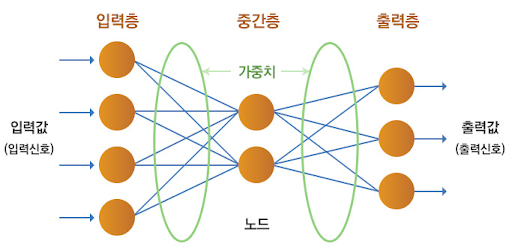

신경망은 모두 3개의 층으로 되어 있다. 위 사진과 같다. 

b를 편향이라고 부르겠다.

b로 뉴런이 얼마나 활성화되느냐가 달려있다. 
위 사진은 b 편향이 보이지 않는다. 

그럼 편향을 명시하면 하단 사진과 같이 명시 할 수 있다. 

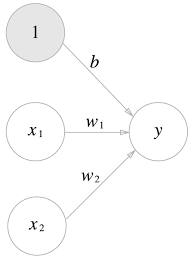

 각 신호에 가중치를 곱한 후 다음 뉴런에 전달 된다. 
 다음 뉴런들은 이 신호들을 더하여, 그 합이 0을 넘으면 1을 출력하고 아니면 0이다.
 
 자 잘 생각 해보라. 
 
 가중치 곱한구 그 합이 넘으면 1 이고 아니면 0 이다. 
 넘어서 0 또는 1로 바뀐다고? 바꿔주는 수식이 없는데? 저절로 된다는 것인가?  
 
 1또는 0으로 저절로 바뀐다? 
 
 이상하다 컴퓨터는 어떠한 정의가 있어야 하는데..
 
 그럼 그것을 하는 함수가 필요하다.
 그게 바로 **활성화 함수 ** 이다. 
 
 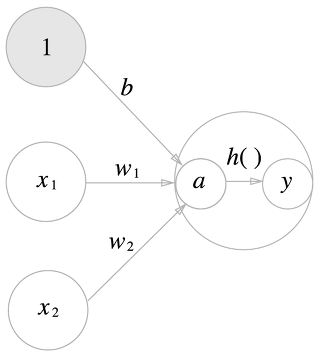
 
 바로 여기서 보이는 **h()** 이다. 

# 활성화 함수 구현하기 

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

 단순하게 생각하면 이렇다. 
    하지만 인수 x는 실수(부동소수점) 만 받아들인다. 
    
수정이 필요로 한다. 

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

x 라는 넘파이 배열을 준비 하고 그 넘파이 배열에 부등호 연산을 수행한다. 

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x > 0
y

array([False,  True,  True])

우리가 원하는 것은 1 또는 0으로 출력 되는 것이다. 

In [5]:
y = y.astype(np.int)
y

array([0, 1, 1])

# 계단 함수의 그래프 

이제 앞에서 정의한 계단 함수를 그래프로 그려 보자 
이를 위해서는  **matplotlib 라이브러리** 를 사용한다. 

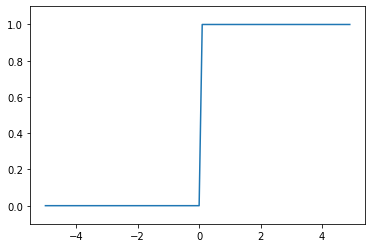

In [7]:
import numpy as np
import matplotlib.pylab as plt

def  step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1 , 1.1)
plt.show()

 1 또는 0 이 출력 되는 함수이다. 
 
 Heaviside 함수라고 부르는 함수이다. 
 
 미분이 0이 나온다.

# 시그모이드 함수 구현하기 

시그모이드 함수를 일단 보자 본 후 설명하는게 이해가 빠르다. 

In [8]:
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

exp = e^ 입니다. 즉, 둘 다 지수 함수(exponential function)입니다.

In [9]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)


array([0.26894142, 0.73105858, 0.88079708])

여기서 보면 음수 값이 없는것을 볼 수 있다. 

In [10]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [11]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

스칼라 값 1.0과 넘파이 배열 사이에서 수치 연산 (+와/) 를 해보았다.

결과적으로 스칼라 값과 넘파이 배열의 각 원소 사이에서 연산이 이뤄지고, 연산 결과가 넘 파이 배열로 출력 되었다. 

앞에서 구현한 sigmoid 함수에도 np.exp(-x)가 넘파이 배열을 반환 하기 때문에 (1 + np.exp(-x))도 넘파이 배열의 각 원소에 연산을 수행한 결과를 내어준다. 


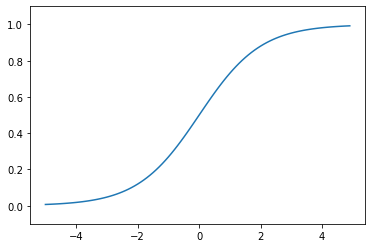

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

 Heaviside의 미분이 불가능한 부분 해소 

# 시그모이드 함수와 계단 함수 비교 

공통점은 0과 1을 반환 한다는 공통점이 있다. 
다른점은 매끄러움이라는 점이 다르다. 

여기서 유심깊게 봐야 할 부분이 있습니다. 둘다 비선형 함수 입니다.
즉, 선형이 아닌 함수이다. 
직선 1개로 그릴 수 없는 함수이다는 것이다. 

함수라는 것은 어떤 값을 입력하면 그에 따른 값을 돌려주는 변환기 입니다. 입력의 상수배 만큼 변하는 함수를 선형 함수라고 합니다. 

## 신경망에서는 활성화 함수로 비선형 함수를 사용해야 합니다. 

선형 함수를사용해서는 안된다. 
그이유는 바로 선형 함수를 사용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다. 

# ReLU 함수 

ReLU 함수는 0을 넘으면 그 입력값을 그대로 출력하고, 0이하면 0을 출려하는 함수이다. 

In [13]:
def relu(x):
    return np.maximum(0,x)

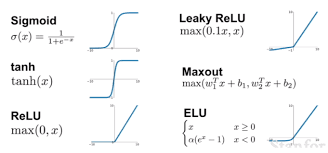

# 다차원 배열의 계산 
다차원 배열도 그 기본은 '숫자의 집합'이다.
숫자가 한줄로 늘어선 것이다. 직사각형으로 늘어놓은 것, 3차원 으로 늘어 놓은것이나 N차원으로 나열하는 것을 통틀오 다차원 배열이라고 한다. 

In [14]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [15]:
np.ndim(A)

1

In [17]:
A

(4,)

In [18]:
A.shape[0]

4

A 는 1차원 임을 볼 수 있다. 

.shape 를 통해 현재 형태를 볼 수 있다. 

 (0,0) 는 2차원
 
 (0,0,0)는 3차원
 
 (0,0,0,0)는 4차원... 차원을 볼 수 있다. 




# 신경망에서의 행렬 곱 

넘파이를 써서 신경망을 구현해 보자.

이번에는 간단한 신경망을 보고 이신경멍은 편향과 할성화 함수를 생략하고 가중치만 갖습니다. 


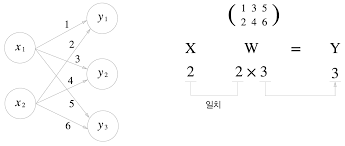

In [20]:
X = np.array([1, 2])
X.shape

(2,)

In [23]:
W = np.array([[1,3,5],[2,4,6]])
W

array([[1, 3, 5],
       [2, 4, 6]])

In [24]:
W.shape

(2, 3)

In [25]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

 여기서 np.dot 는 전치 해주는 함수이다. 

# 3층 신경망 구현하기 

이미지로 한층 한층 순서대로 따라 오길 바란다. 

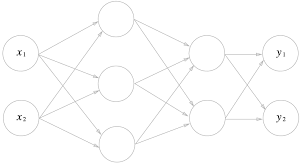


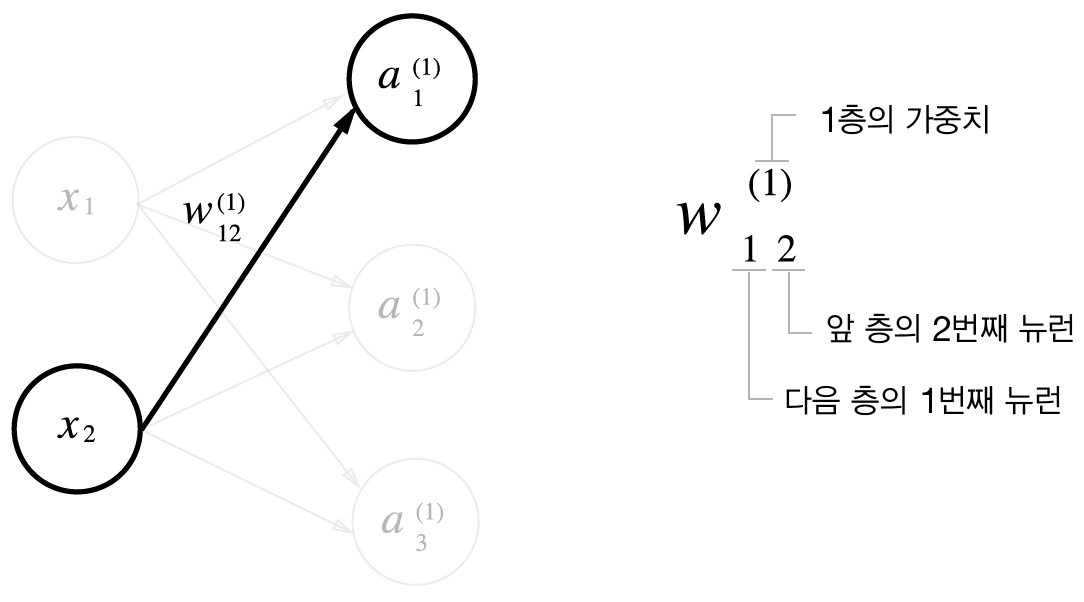

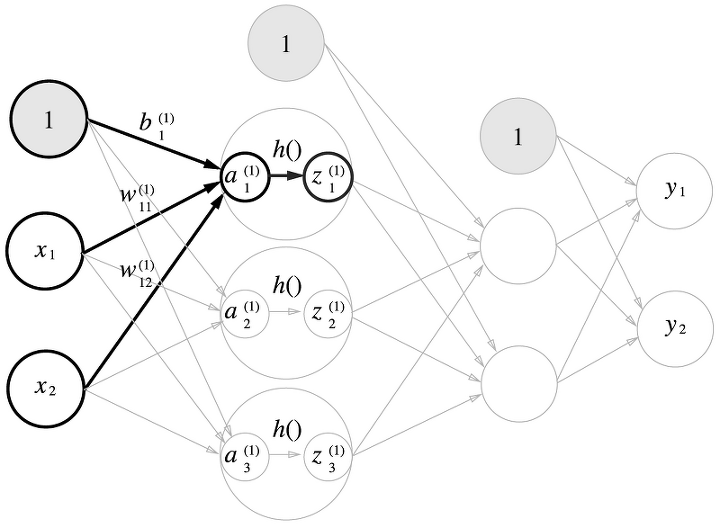

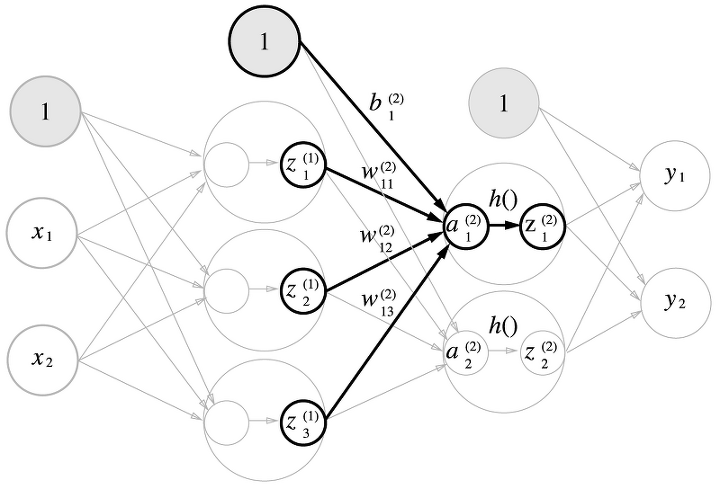

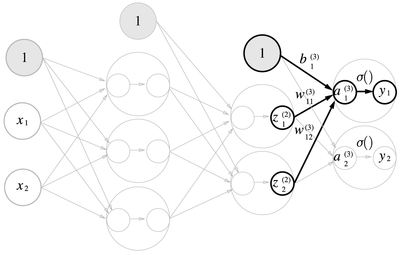

 # 소스 코드로 구현한다. 

In [29]:
# 1층 신경망 구현 

X = np.array([1.0, 0.5])                             # 노드(자료)
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])    # 가중치 
B1 = np.array([0.1, 0.2, 0.3])                       # 편향

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [30]:
# 활성화 함수 (시그모이드 함수로 재현)

Z1 = sigmoid(A1)
 
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [32]:
# 2 층 신경망 구현 

W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(X.shape)
print(B1.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3,)
(2,)
(3,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [36]:
# 3층 신경망 구현 (출력층)

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

print(W3.shape)
print(B3.shape)

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(Y)

(2, 2)
(2,)
[0.31682708 0.69627909]


# 구현 모두 정리 
 이로써 3층 신경망에 대한 설명은 끝 !!! 

In [42]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)  # [ 0.31682708  0.69627909]

print(y)

[0.31682708 0.69627909]


# 출력층 설계하기 

일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용합니다. 

# 항등 함수와 소프트맥스 함수 구현하기

항등 함수 는 입력 그대로 출력한다. 

하지만 소프트맥스 함수 식은 다음과 같다. 

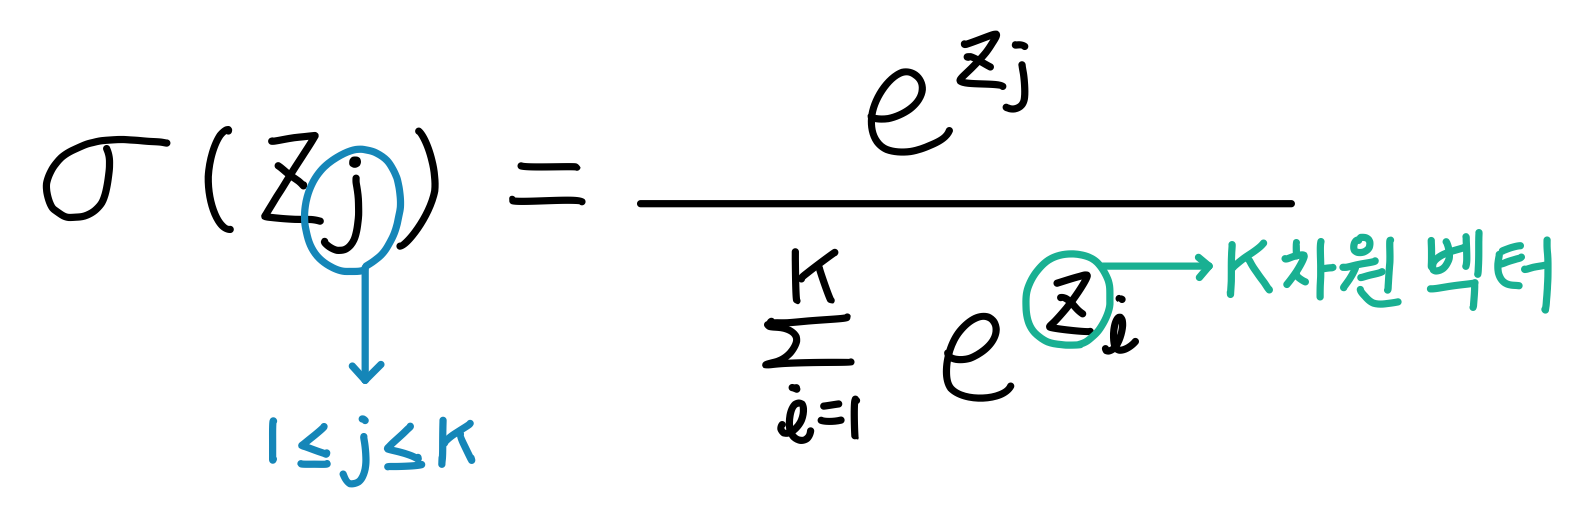


소프트맥스 함수 softmax function

yk = exp(ak) / sigma(i=1 to n)(exp(ai))

In [43]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y


# 소프트맥스 함수 구현시 주의점

소프트맥스 함수는 지수함수를 사용하기 때문에 아주 큰 값을 사용하게 되고,

오버플로로 인해 결과 수치가 불안정해질 수 있다.

분자분모에 특정 수치(일반적으로 최대값)을 곱해줘서 결과를 보정한다.

In [45]:
a = np.array([1010, 100, 990])
np.exp(a) / np.sum(np.exp(a))  # 소프트맥스 함수의 계산

<ipython-input-45-15d7ab15f4aa>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-45-15d7ab15f4aa>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan,  0., nan])

In [46]:
c = np.max(a) # c = 1010 (최대값)
a-c

array([   0, -910,  -20])

In [47]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99999998e-01, 0.00000000e+00, 2.06115362e-09])